In [64]:
import pandas as pd
#import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression , RidgeCV
from sklearn.metrics import mean_absolute_error

In [65]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [66]:
df.shape

(30, 17)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [68]:
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5

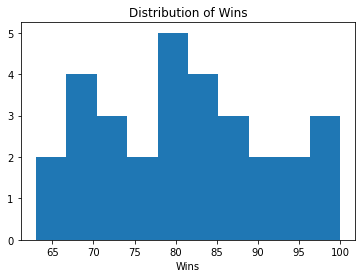

In [69]:
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')
plt.show()

In [70]:
print(df['W'].mean())

80.96666666666667


In [71]:
# Create bins of wins by applying `assign_win_bins` to `df['W']`    
df['win_bins'] = df['W'].apply(assign_win_bins)

In [72]:
# how each variables/features is correlated with target variable
C = df.corr()['W']
C

W           1.000000
R           0.430751
AB         -0.087947
H           0.037612
2B          0.427797
3B         -0.251118
HR          0.307407
BB          0.484342
SO          0.111850
SB         -0.157234
RA         -0.812952
ER         -0.809435
ERA        -0.819600
CG          0.080533
SHO         0.471805
SV          0.666530
E          -0.089485
win_bins    0.917736
Name: W, dtype: float64

In [73]:
attributes=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']

In [74]:
data_attributes = df[attributes]
print(data_attributes)

      R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5   891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.5

In [75]:
kmeans = KMeans(n_clusters=6, random_state=1)
distances = kmeans.fit_transform(data_attributes)
print(distances)
labels = kmeans.labels_
print(labels)

[[391.58071573 379.87807181 287.66139539 423.08475438   0.
  271.85893359]
 [223.73314104  70.41846072 152.47951862 176.77751565 361.21062498
  191.38864424]
 [339.47398683 219.08733199 126.09367787 201.67777527 299.27746925
  204.43589425]
 [206.45900989  97.54812627 144.56313811 217.62049539 318.87154545
  195.66126375]
 [ 89.50617763 221.40817373 303.85835006 348.19371485 371.40251493
  187.78171435]
 [375.76364038 339.02466859 334.51389224 326.3889682  331.96235464
  194.82581558]
 [254.35718508 189.51304745 246.32498939 221.44184144 345.97700791
   99.75562026]
 [238.16565859 102.62437671 235.55997453 173.53101795 414.54807007
  223.51231555]
 [272.09024698 109.15021744 192.20710939 107.35672226 381.6058177
  223.66426233]
 [201.98819371 259.68345975 283.83902128 349.44979988 260.1544472
  114.95762947]
 [186.85904447 142.16457253 201.82802803 228.74011905 332.18257043
   98.11332057]
 [356.93625257 210.26430214 308.75345115 110.20382838 478.14121931
  284.2093876 ]
 [311.84941211

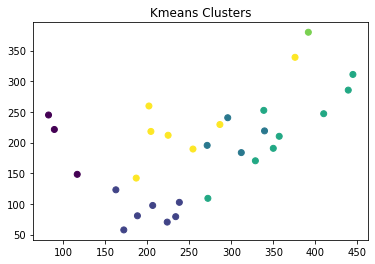

In [76]:
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')
plt.show()

In [77]:
df['labels'] = labels
attributes.append('labels')

In [78]:
print(labels)

[4 1 2 1 0 5 5 1 3 5 5 3 2 1 5 3 3 3 1 1 3 3 2 2 0 3 5 5 1 0]


In [82]:
################### buliding model ################### 

numeric_cols = ['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E','labels','W']
data = df[numeric_cols]
print(data)

      R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5   891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.5

In [83]:
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

In [84]:
x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

In [89]:
lr = LinearRegression(normalize = True)
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(predictions)

[ 97.04075437  87.48429108  78.3240084   82.9268382   83.42076495
 100.28580358  74.96970602  68.70181033]


In [90]:
mae = mean_absolute_error(y_test,predictions)
print(mae)

2.3073463305690343


In [91]:
rrm =  RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train,y_train)
predictions = rrm.predict(x_test)

In [88]:
mae = mean_absolute_error(y_test,predictions)
print(mae)

3.0184295984530447
